# Lab \#2: Probability, Distributions, and Statistical Questions

## Problem 1  

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).
  
**A) Show how the probability distribution of the background changes as you integrate (sum) for more days.**

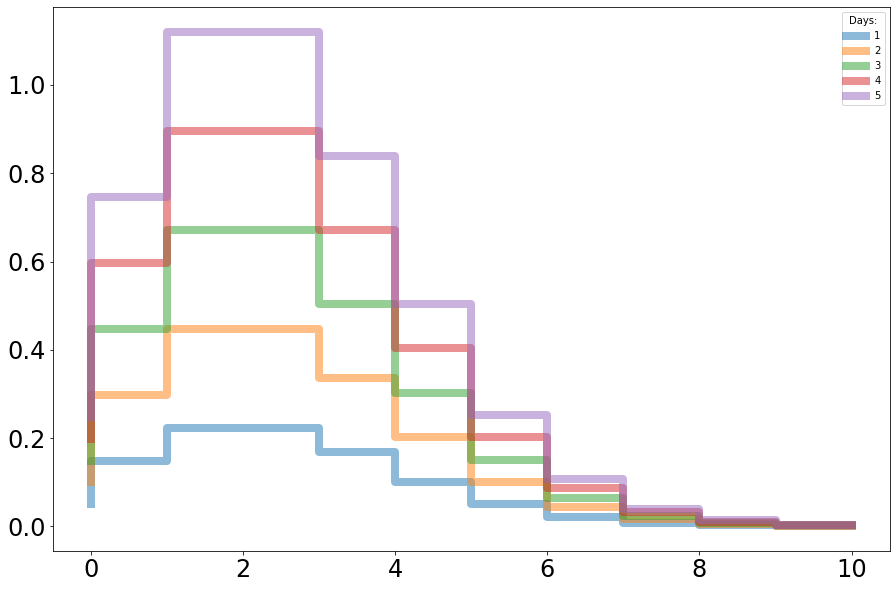

In [194]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib.patches import Polygon

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 18)

# pick 3 as X, 5 as Y

average = 3
maxDays = 5
value = 3
x = np.linspace(0,10,11)
base = stats.poisson.pmf(x, average, loc=0)

for days in range(1,maxDays+1):
    distribution = base*days
    ax.step(x, distribution, linewidth=8, alpha=0.5, label=days)
    
plt.legend(title="Days:")
plt.tick_params(labelsize = 24)
plt.show()

**B)  Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**

The purple line on the graph above corrosponds to the distribution summed over 5 days.  This is still a poisson distribution, just scaled up.  This makes sense mathematically since we are just multiplying all of the values in the pmf by a constant, thus changing the scale but not the shape.

**C) Show how the probability distribution evolves as you *average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.**

P value =  0.2977877354190898 for  1  days.
P value =  0.13690356997976133 for  4  days.
P value =  0.026179914755033146 for  7  days.
P value =  0.0024887451199616987 for  10  days.
P value =  0.00016218924311232205 for  13  days.
P value =  8.471767879838446e-06 for  16  days.
P value =  3.815279703009674e-07 for  19  days.
P value =  1.536987690959875e-08 for  22  days.


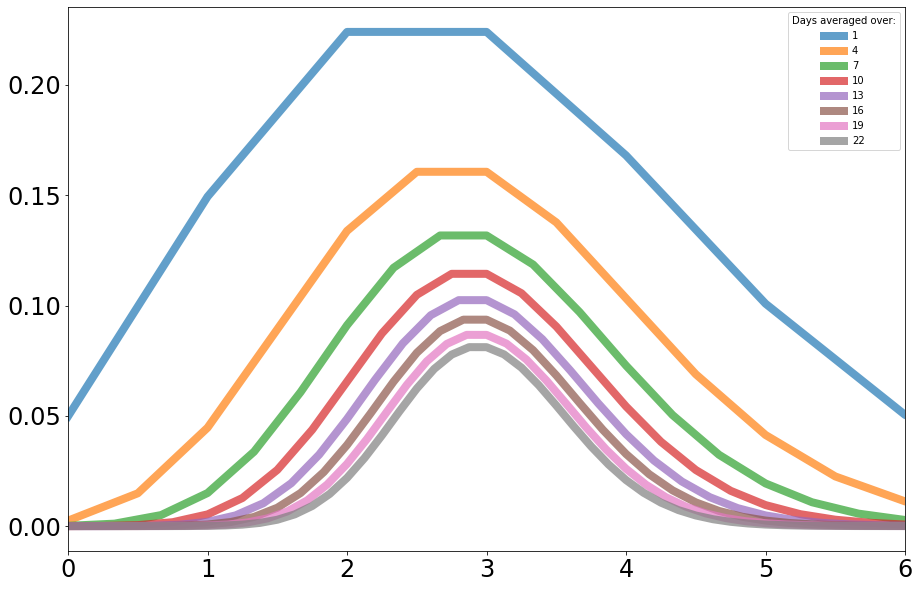

In [248]:
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
average = 3
maxDays = 23
value = 20
x = np.linspace(0,10,11)
distribution = stats.poisson.pmf(x, average, loc=0)
ave = distribution

for day in range(1,maxDays,3):
    x = np.linspace(0,10,ave.size)
    ax.plot(x, ave, linewidth=8, alpha=0.7, label=day)
    a, b =stats.normaltest(ave)
    print("P value = ",b, "for ",day," days.")
    ave = np.convolve(distribution,ave)
    
plt.tick_params(labelsize = 24)
plt.legend(title="Days averaged over:")
plt.xlim([0,6])
plt.show()

As we can see from the graph above, as we average over more and more days, we tend to approach a gaussian distribution.  The central limit theorem tells us that as we convolve a distribution with itself over, we will necesarilly approach a gaussian.  The proof of a poisson approaching a gaussian is shown [here](https://www.roe.ac.uk/japwww/teaching/astrostats/astrostats2012_part2.pdf).  The difference between this and part **B)** is that in that part we are summing the distribution over multipe days.


**D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation.**

2.49432141607997e-10


6.219461413169016

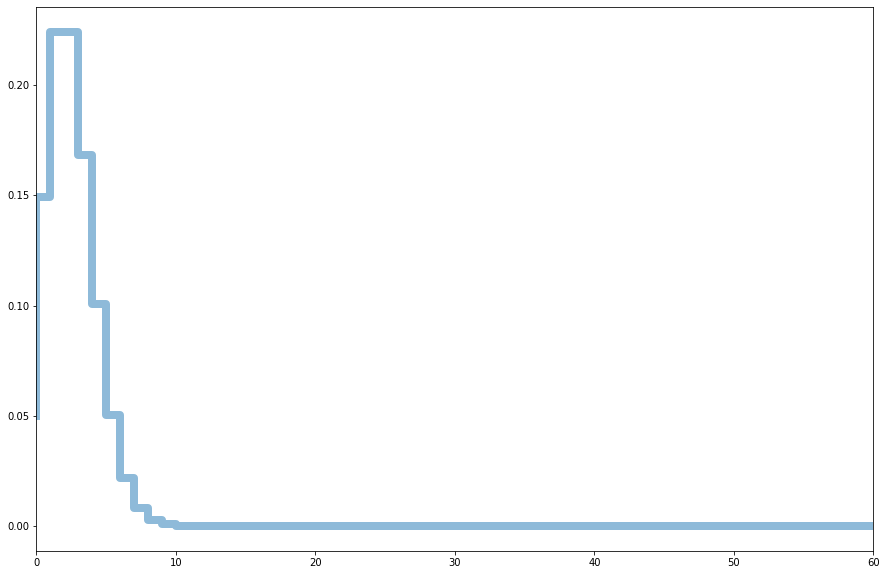

In [219]:
plt.rcParams["figure.figsize"] = (15,10)  
fig, ax = plt.subplots(1, 1)
days = 3
rays = days*value
x = np.linspace(0,rays*2,rays*2+1)
plt.xlim([0,rays])

distribution = stats.poisson.pmf(x, average)
ax.step(x, distribution, linewidth=8, alpha=0.5)

prob = (1 - sum(distribution[0:value]))*days
print(prob)
stats.norm.ppf(1-prob)

# Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

**A) Show how the distribution changes as you average over more observing intervals.**

P value =  1.1041529994866497e-08 for  0  iterations.
P value =  2.2991358932451044e-236 for  1  iterations.
P value =  9.580025697099018e-30 for  2  iterations.
P value =  5.982270876375517e-16 for  3  iterations.
P value =  1.9975538166693326e-16 for  4  iterations.
P value =  3.6712616494830486e-21 for  5  iterations.
P value =  6.292031498933836e-28 for  6  iterations.
P value =  6.092566084705978e-36 for  7  iterations.
P value =  7.606656657544333e-45 for  8  iterations.
P value =  1.9221442251530466e-54 for  9  iterations.


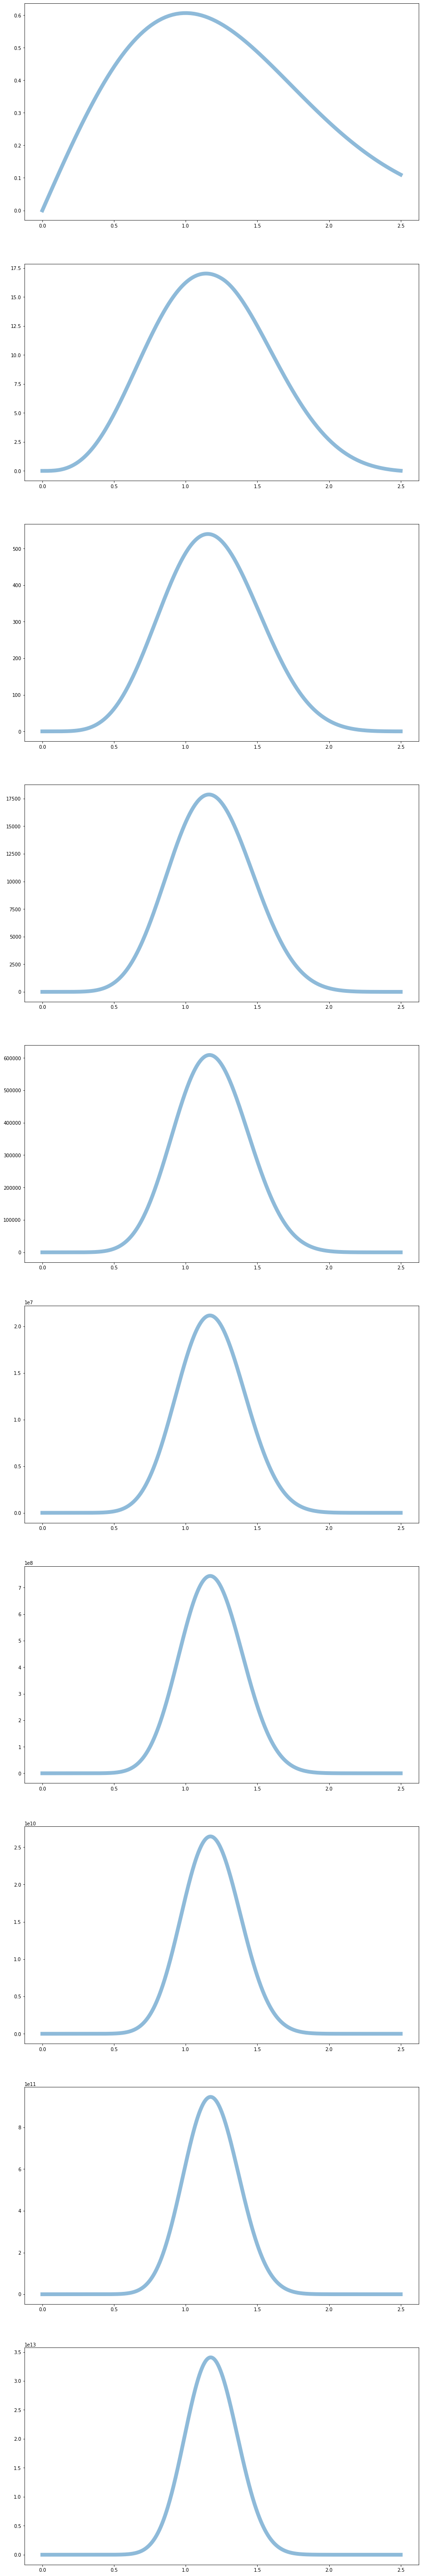

In [250]:
plt.rcParams["figure.figsize"] = (15,100)  
xMax = 2.5
iterations = 10
fig, ax = plt.subplots(iterations, 1)
x = np.linspace(0,xMax,100)
init = stats.rayleigh.pdf(x, loc=0, scale=1)
dist = init

for iter in range(iterations):
    x = np.linspace(0,xMax, dist.size)
    ax[iter].plot(x, dist, linewidth=8, alpha=0.5)
    a, b =stats.normaltest(dist)
    print("P value = ",b, "for ",iter," iterations.")
    dist = np.convolve(dist, init)

**B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**

